In [38]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = yf.download('AAPL','2008-01-01','2023-03-15')

[*********************100%***********************]  1 of 1 completed


In [40]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.922568,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.925304,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.472994,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.399739,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.205502,1523816000


In [41]:
data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900


In [42]:
#Check for missing values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

TypeError: 'str' object is not callable

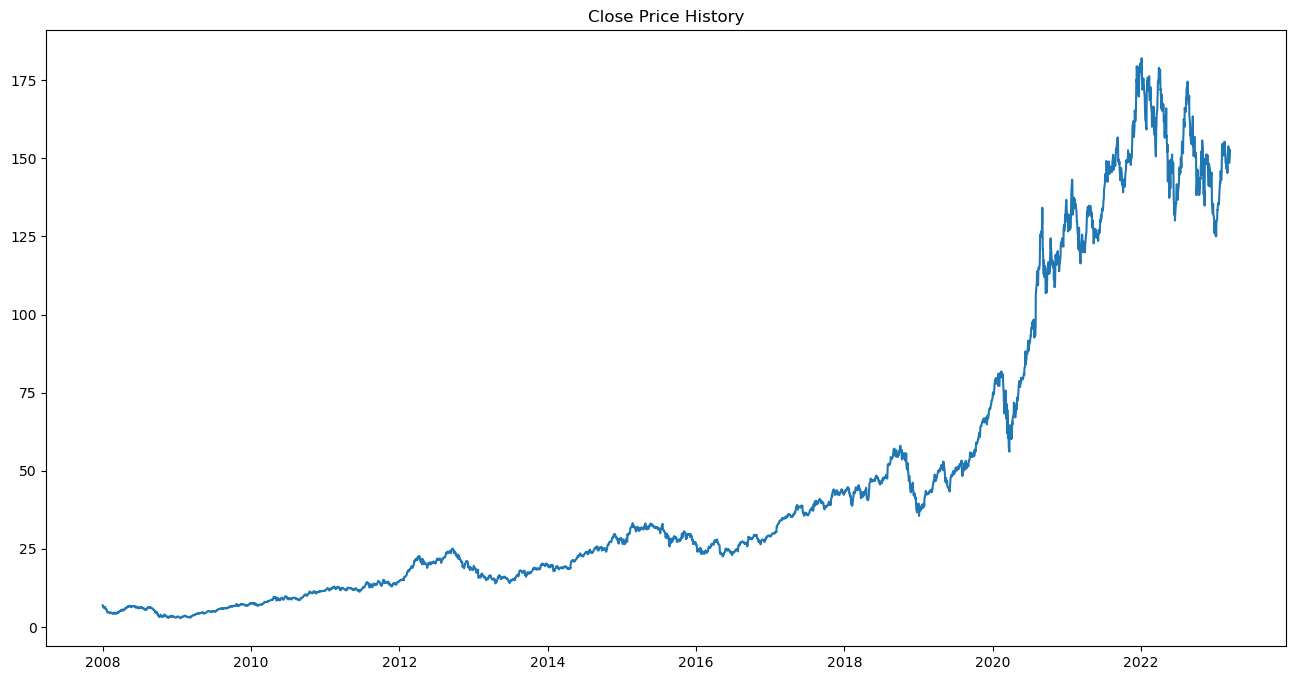

In [43]:
#Plotting the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

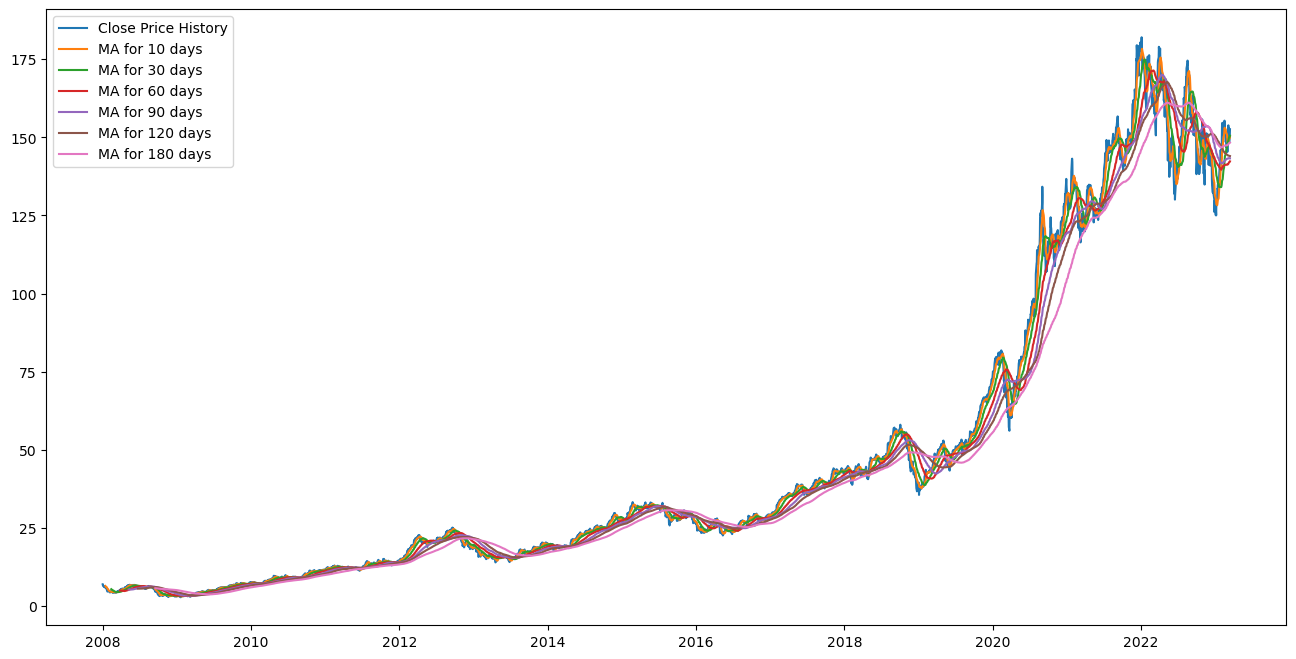

In [ ]:
#Plot the moving average of the stock to select the best timestep for the LSTM model
#Select the moving average that shows the least volatility to select the best timestep
moving_average_day = [10,30,60, 90, 120, 180]

for ma in moving_average_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name] = data['Close'].rolling(ma).mean()

#Plot the moving average of the stock
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price History')
for ma in moving_average_day:
    column_name = "MA for %s days" %(str(ma))
    plt.plot(data[column_name], label=column_name)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Plot the volume of the stock
plt.figure(figsize=(16,8))
plt.plot(data['Volume'], label='Volume History')
plt.legend(loc='upper left')
plt.show()

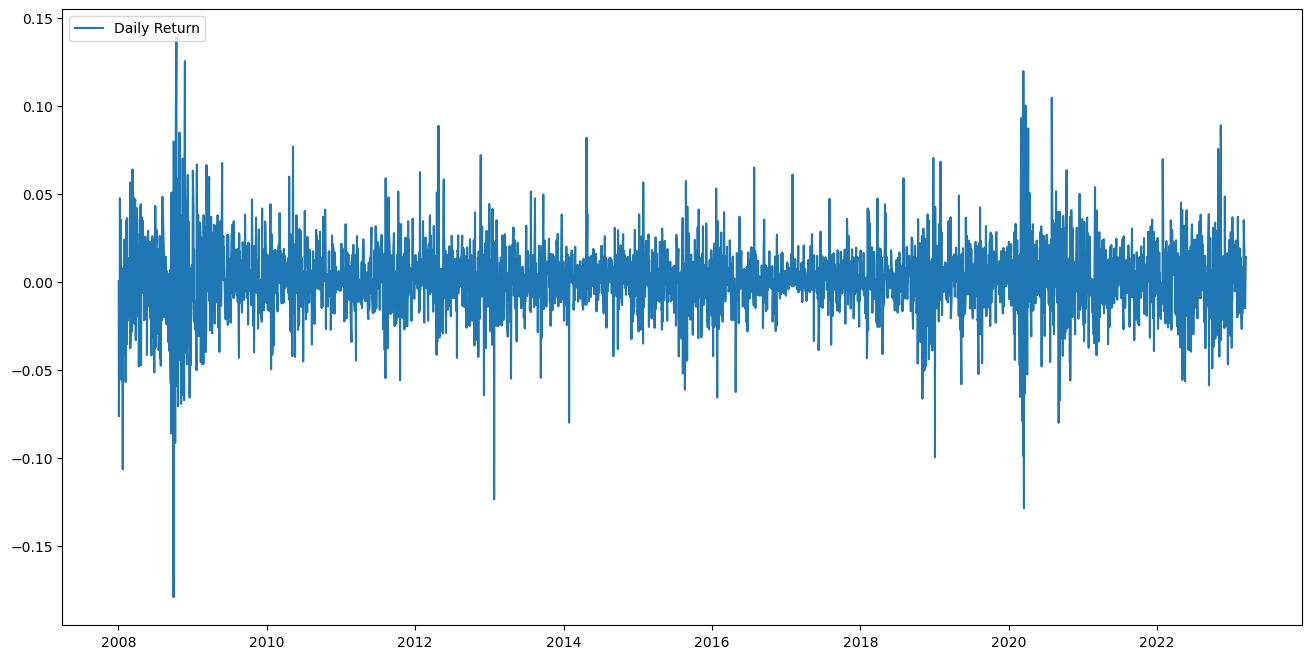

In [ ]:
#plot the daily return of the stock
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(16,8))
plt.plot(data['Daily Return'], label='Daily Return')
plt.legend(loc='upper left')
plt.show()

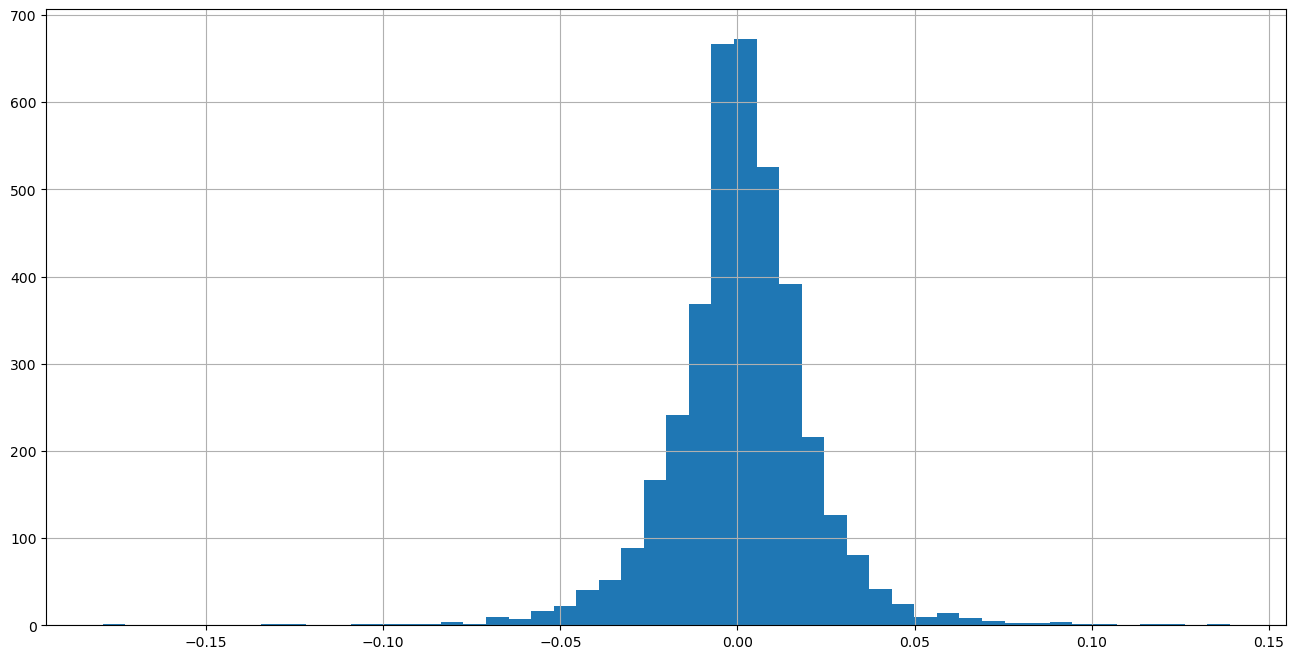

In [ ]:
#Determine if the stock is risky or not
plt.figure(figsize=(16,8))
plt.hist(data['Daily Return'].dropna(), bins=50)
plt.xlabel = ('Daily Return')
plt.ylabel = ('Frequency')
plt.grid()
plt.show()